In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from scipy.stats import linregress

In [4]:
# Constants 
lower = 1.8292885330785609e-09
upper = 6.1707114669130533e-09
volume = (upper - lower) ** 3
print("Volume of simulation box is", volume, "m^3")

mass = 6.63e-26 # set mass of interacting potentials, take hydrogen gas for example (in kg)
epsilon = 0.24 # in kcal/mol
sigma = 3.405e-10 # in m
tau = np.sqrt(mass*sigma**2/epsilon)
print("The coefficent Tau is", tau)

Volume of simulation box is 8.182693580260386e-26 m^3
The coefficent Tau is 1.7896506380436378e-22


In [5]:
# generate list with all line numbers that will be read in 
header = 9
atoms_no = 2000
timesteps = 50
size = 100000


line_numbers = []
for i in range(size + header*timesteps):
    if (i+1) % (atoms_no + header) <= header and (i+1) % (atoms_no + header) != 0:
        pass
    else:
        line_numbers.append(i)
        
print(len(line_numbers))

100000


In [6]:
# Read in Data Files

with open(r"diffusionB.xyz", 'r') as file:
    lines = []
    for i, line in enumerate(file):
        if i in line_numbers:
            lines.append(line.strip())
        else:
            pass

In [7]:
input_array = np.array(lines)
new_input = np.array([np.array([float(i.strip()) for i in j.split(' ') if i]) for j in input_array])
array = np.transpose(new_input)

item = array[0]
atom_float = array[1]
atom = atom_float.astype(int)
identity = array[2]

x_disordered = 10e-10 * array[4] # x-position inside box (in m)
y_disordered = 10e-10 * array[5] 
z_disordered = 10e-10 * array[6]

In [14]:
# Make arrays with the 50 positions of the individual atoms 

atoms = []
x = []
y = []
z = []


for i in range(1, atoms_no +1):
    for j in enumerate(atom):
        if j[1] == i:
            atoms.append(atom[j[0]])
            x.append(x_disordered[j[0]])
            y.append(y_disordered[j[0]])
            z.append(z_disordered[j[0]])  
        else:
            pass

In [9]:
def distance(x, y, z):
    return np.sqrt((x[j])**2 + (y[j])**2 + (z[j])**2)

In [13]:
# Mean square displacement (compute for each timestep)

distances_0 = []
square_distances = []
MSD = []

# Distances at t=0 for all 2000 atoms 
for j in range(0, 100000, 50): 
    distances_0.append(distance(x, y, z))

# square displacements relative to t=0 for all atoms 
for j in range(0, 100000):
    atom_iteration = int(j / 50)
    if j % 50 == 0:
        pass
    else:
        distance_timestep = (distance(x, y, z) - distances_0[atom_iteration]) ** 2
        square_distances.append(distance_timestep)
    
# MSD for the 49 timesteps after t=0
for i in range(0, 49):
    MSD_t = 0
    for j in range(0+i, len(square_distances), 49):
        MSD_t += 1/2000 * square_distances[j]
    MSD.append(MSD_t)

    
    
#for i in range(1, timesteps):
#    for j in range(1, atoms_no+1):
#    MSD.append(distance(x, y, z)) 

print(len(square_distances))
print(MSD)

IndexError: index 50 is out of bounds for axis 0 with size 49

Text(0, 0.5, 'MSD [m^2]')

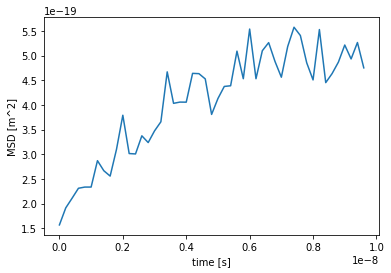

In [11]:
timestep = 10000 * 2 * 10e-15 # duration of timestep in seconds 
x = timestep * np.arange(30)
plt.plot(x, MSD)
plt.xlabel('time [s]')
plt.ylabel('MSD [m^2]')

The system diffuses linearly until ca. 6 ns, when it hits a boundary which prevents further diffusion. To calculate the diffusion constant, we therefore only consider the MSD values up until 6 ns.

In [17]:
# Calculate diffusion coefficient: MSD = 2nDt
# n - number of dimensions: n=3
# Thus MSD = 6Dt -> D = MSD/(6t) = slope / 6



In [18]:
D = 5.8e-11 / 6
print('The Diffusion coefficient is', D, 'm^2/s.')
D_reduced_units = D / (sigma**2) * tau
print('The Diffusion coefficient in reduced units is', D_reduced_units, 'Angstrom/Tau.')

The Diffusion coefficient is 9.666666666666667e-12 m^2/s.
The Diffusion coefficient in reduced units is 1.4921441145551407e-14 Angstrom/Tau.
